#### 분석목적: 학력, 교육연수, 혼인상태, 직업정보가 있는 연봉데이터셋을 이용해 연봉 예측하기
* 연봉이 5만달러 이상인지 아닌지
* age: 나이
* workclass: 고용형태
* education: 학력
* education-num: 교육연수
* marital-status: 혼인상태
* occupation: 직업
* relationship: 가족관계
* race: 인종
* sex: 성별
* capital-gain: 자산증가
* capital-loss: 자산감소
* hours-per-week: 주당 노동 시간
* native-country: 본국
* class: 연봉구분 - target(분석대상)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
data = pd.read_csv("./data/salary2.csv")
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      46033 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  47985 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [6]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [7]:
data.isna().sum() / len(data) * 100

age               0.000000
workclass         5.730724
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        5.751198
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    1.754637
class             0.000000
dtype: float64

In [8]:
data.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'class'],
      dtype='object')

In [11]:
na_df = data[data['workclass'].isna()]
na_df

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,NaN,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,<=50K
22,72,NaN,7th-8th,4,Divorced,NaN,Not-in-family,White,Female,0,0,6,United-States,<=50K
35,65,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35,NaN,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,>50K
48812,30,NaN,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
48820,71,NaN,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,>50K
48822,41,NaN,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [14]:
data['class'].value_counts(normalize=True)

class
<=50K    0.760718
>50K     0.239282
Name: proportion, dtype: float64

In [15]:
na_df['class'].value_counts(normalize=True)

class
<=50K    0.905323
>50K     0.094677
Name: proportion, dtype: float64

# 결측 비율이 5%정도이고 종속변수 비율에 큰 영향이 없으므로 삭제 

In [18]:
#native-country 1.754637 작으니까 ㄱㅊ

In [16]:
data = data.dropna()
data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [17]:
# 리셋해서 컬럼 드롭
data = data.reset_index(drop=True)
data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
45218,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
45219,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
45220,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [19]:
data.describe(include='all')

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
count,45222.000000,45222,45222,45222.000000,45222,45222,45222,45222,45222,45222.000000,45222.000000,45222.000000,45222,45222
unique,NaN,7,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Craft-repair,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33307,14783,NaN,21055,6020,18666,38903,30527,NaN,NaN,NaN,41292,34014
mean,38.547941,NaN,NaN,10.118460,NaN,NaN,NaN,NaN,NaN,1101.430344,88.595418,40.938017,NaN,NaN
std,13.217870,NaN,NaN,2.552881,NaN,NaN,NaN,NaN,NaN,7506.430084,404.956092,12.007508,NaN,NaN
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,47.000000,NaN,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


<Axes: >

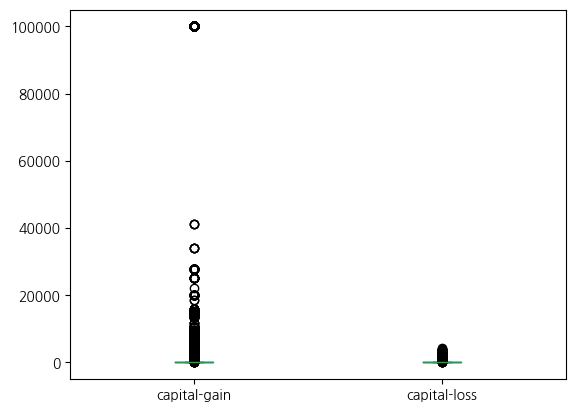

In [21]:
data[['capital-gain','capital-loss']].plot(kind='box')

In [23]:
data[['capital-gain','capital-loss']].describe()

,capital-gain,capital-loss
count,45222.000000,45222.000000
mean,1101.430344,88.595418
std,7506.430084,404.956092
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,99999.000000,4356.000000


In [29]:
capital_df = data[(data['capital-gain']> 0) | (data['capital-loss'] > 0)]
capital_df

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,63,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,65,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
11,48,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,3103,0,48,United-States,>50K
20,45,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7298,0,90,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45182,66,Federal-gov,10th,6,Married-civ-spouse,Craft-repair,Husband,White,Male,3471,0,40,United-States,<=50K
45185,57,Local-gov,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,40,United-States,>50K
45202,38,Private,Bachelors,13,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K
45209,65,Self-emp-not-inc,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,1086,0,60,United-States,<=50K


In [33]:
for col in capital_df :
    print(capital_df[col].dtype)

    if capital_df [col].dtype == 'object':
        print(capital_df[col].value_counts())
        print()

int64
object
workclass
Private             3984
Self-emp-not-inc     597
Local-gov            452
Self-emp-inc         425
State-gov            236
Federal-gov          233
Without-pay            3
Name: count, dtype: int64

object
education
HS-grad         1520
Bachelors       1385
Some-college    1065
Masters          601
Prof-school      301
Assoc-voc        267
Assoc-acdm       191
Doctorate        174
11th             120
10th              84
7th-8th           81
9th               52
5th-6th           36
12th              34
1st-4th           13
Preschool          6
Name: count, dtype: int64

int64
object
marital-status
Married-civ-spouse       3861
Never-married            1074
Divorced                  668
Widowed                   153
Separated                 122
Married-spouse-absent      49
Married-AF-spouse           3
Name: count, dtype: int64

object
occupation
Prof-specialty       1236
Exec-managerial      1229
Sales                 750
Craft-repair          731
Adm-cler

In [34]:
cat_cols = data.select_dtypes(include='object')
num_cols = data.select_dtypes(exclude='object')
num_cols

,age,education-num,capital-gain,capital-loss,hours-per-week
0,25,7,0,0,40
1,38,9,0,0,50
2,28,12,0,0,40
3,44,10,7688,0,40
4,34,6,0,0,30
...,...,...,...,...,...
45217,27,12,0,0,38
45218,40,9,0,0,40
45219,58,9,0,0,40
45220,22,9,0,0,20


# 배깅을 이용한 분석

In [35]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
bc = BaggingClassifier(estimator=10, )